In [1]:
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_general, tensor_basis
from quspin.tools.measurements import obs_vs_time
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#constant parameters
N  = 1     #system size
S1 = '5/2' #spin of 1
S2 = '1/2' #spin of 2
J  = 1.0   #coupling strength

h1 = 0.9   #field strength/magnitude 1
h2 = 0.1   ##field strength/magnitude 2

In [3]:
def makeBasis(N, S1, S2):
    basis1 = spin_basis_general(N=N, S=S1)
    basis2 = spin_basis_general(N=N, S=S2)
    basis  = tensor_basis(basis1, basis2)
    return basis

def spinOps(h1, h2, theta, phi, basis):    
    zComp1 = h1*np.cos(theta)               #static comp. for 1
    xComp1 = h1*np.sin(theta)*np.cos(phi)
    yComp1 = h1*np.sin(theta)*np.sin(phi)
        
    minus1 = [xComp1/2 - 1j*yComp1/2, 0]
    plus1  = [xComp1/2 + 1j*yComp1/2, 0]
    
    zComp2 = h2*np.cos(theta)               #static comp. for 2
    xComp2 = h2*np.sin(theta)*np.cos(phi)
    yComp2 = h2*np.sin(theta)*np.sin(phi)
    
    minus2 = [xComp2/2 - 1j*yComp2/2, 0]
    plus2  = [xComp2/2 + 1j*yComp2/2, 0]
    
    static1 = [
        ["z|",[[zComp1, 0]]],   #z comp 1
        ["-|", [minus1]],       #- op 1
        ["+|", [plus1]],        #+ op 1
    ]
    
    static2 =  [
        ["|z",[[zComp2, 0]]],   #z comp 2
        ["|-", [minus2]],       #- op 2
        ["|+", [plus2]]         #+ op 2
    ]
    
    H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
    H2 = hamiltonian(static2, [], dtype=np.complex128, basis=basis) #to make operators for 2
    
    return H1, H2

In [4]:
basis = makeBasis(N, S1, S2)
Jx_1, Jx_2 = spinOps(h1, h2, np.pi/2, 0, basis)
Jy_1, Jy_2 = spinOps(h1, h2, np.pi/2, np.pi/2, basis)
Jz_1, Jz_2 = spinOps(h1, h2, 0, 0, basis)

Hermiticity check passed!


C:\Users\Rey\miniconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
C:\Users\Rey\miniconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian


Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!


C:\Users\Rey\miniconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
C:\Users\Rey\miniconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian
C:\Users\Rey\miniconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
C:\Users\Rey\miniconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian


Hermiticity check passed!


C:\Users\Rey\miniconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
C:\Users\Rey\miniconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian


In [5]:
#make H directly out of Jx operators, same data type as hamiltonians returned by spinOps
#H = -h1*Jx_1 - h2*Jx_2

H = - h1*Jx_1 - h2*Jx_2

C:\Users\Rey\miniconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


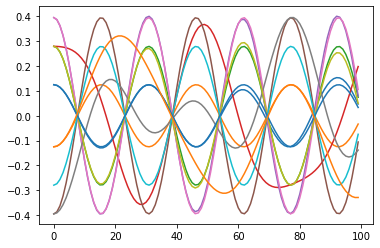

In [59]:
#find ground state, time evolve this state
vals, vects = H.eigh()
times = np.linspace(0.0, 10.0, 100)

v_t = H.evolve(vects[0], t0=0, times=times)

#what are the axes? also what actually is the v_t output matrix??
plt.plot(v_t.T)

In [33]:
print(vals[0])
print(vects[0])

-0.6249999999999983 -0.3749999999999999
[-0.25     -0.j  0.4330127+0.j -0.5      -0.j  0.       +0.j
  0.5      -0.j  0.       +0.j  0.4330127-0.j  0.25     -0.j]


In [7]:
eVals, eVects = Jx_1.eigh()
print(eVects)
print(Jx_2)

[[ 0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
  -0.70710678-0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.        +0.j
   0.        +0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j -0.70710678-0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j -0.70710678+0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.70710678+0.j]
 [-0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
  -0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.        +0.j
   0.        +0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.70710678+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j -0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.70710678+0.j
   